In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
# 把特征数据增加一个纬度，用于LeNet5的输入
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# 特征数据归一化
x_train = x_train/255.0
x_test = x_test/255.0

# 标签做onehot
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [4]:
# 使用sequential构建LeNet-5模型
model = keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='sigmoid'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='sigmoid'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='sigmoid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [5]:
# 训练模型并保存
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
model.save('./model/mnist.h5')

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7928 - acc: 0.7426 - val_loss: 0.2168 - val_acc: 0.9355
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1720 - acc: 0.9472 - val_loss: 0.1225 - val_acc: 0.9646
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1098 - acc: 0.9673 - val_loss: 0.0861 - val_acc: 0.9732
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0837 - acc: 0.9741 - val_loss: 0.0633 - val_acc: 0.9805
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0665 - acc: 0.9790 - val_loss: 0.0617 - val_acc: 0.9802
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0575 - acc: 0.9818 - val_loss: 0.0594 - val_acc: 0.9807
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0492 - acc: 0.9846 - val_loss: 0.0554 - val_acc: 0.9814
Epoch 8/10
1875/1875 [==============================] -

1/1 [==============================] - 0s 62ms/step
[[6.5581151e-04 6.9495678e-07 6.6155576e-07 1.2942192e-07 2.6441887e-05
  6.9918344e-04 9.9857855e-01 6.1663710e-09 2.0868118e-05 1.7543331e-05]]
识别的数字为: 6


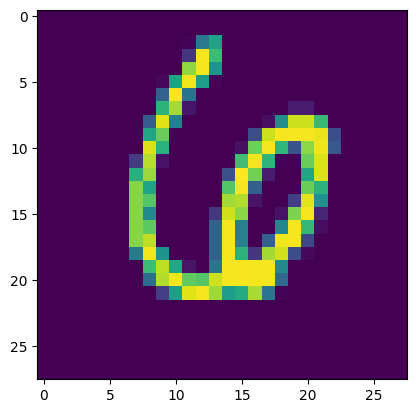

In [6]:
# 加载模型并预测
import cv2
img = cv2.imread('./data/MNIST_Data/test/mnist_test/6/66.png', 0)
plt.imshow(img)

img = cv2.resize(img, (28,28))
img = img.reshape(1, 28, 28, 1)
img = img/255.0

my_model = tf.keras.models.load_model('./model/mnist.h5')
predict = my_model.predict(img)
print(predict)
print('识别的数字为:', np.argmax(predict))